### New DataFrame

In [33]:
# Settings to allow all columns in dataframe to display
import pandas as pd
import numpy as np
# test2
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',300)

In [34]:
# Import custom functions
import api
import data_cleaning as dc
import feature_engineering as fe
import train as tr

# Importing the most recent data
url = 'https://moneypuck.com/moneypuck/playerData/careers/gameByGame/all_teams.csv'
rawData = api.api_call(url)
print("** The raw data has been successfully downloaded.")

# Cleaning the rawData
cleanData = dc.clean(rawData)
print("** The raw data has been successfully cleaned.")

# Feature Engineering using the cleanData
df = fe.fengine(cleanData)
print("** Feature Engineering has been successfully completed.")

** The raw data has been successfully downloaded.
** The raw data has been successfully cleaned.
** Feature Engineering has been successfully completed.


In [35]:
df.head()

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
3931,NYR,2018,NYR,2018020006,NYR,NSH,0,0,0,1,HOME,2018-10-04,Team Level,all,0.6160,0.4874,0.5341,3600.0,34.472,2.984,2.224,7.267,1.042,18.851,14.633,2.948,2.852,2.818,36.0,11.0,11.0,58.0,2.0,2.0,1.0,5.0,1.0,22.0,15.0,34.0,45.0,2.0,4.0,29.0,24.0,10.0,10.0,33.0,11.0,3.0,0.785,1.412,0.787,0.0,0.0,2.0,55.535,47.0,45.081,2.0,0.486,0.521,0.521,2.949,2.819,2.790,29.403,1.860,1.845,7.090,0.898,16.864,12.443,1.849,1.953,1.941,33.0,8.0,20.0,61.0,3.0,0.0,0.0,8.0,2.0,12.0,16.0,30.0,38.0,3.0,6.0,32.0,21.0,16.0,9.0,33.0,7.0,1.0,0.893,0.736,0.231,2.0,0.0,1.0,64.070,41.0,42.797,4.0,0.384,0.000,0.000,2.244,2.357,2.342,0,2018,10,4,1,19,17
3936,NYR,2018,NYR,2018020017,NYR,BUF,0,0,0,1,AWAY,2018-10-06,Team Level,all,0.5210,0.5397,0.5500,3600.0,38.416,3.506,2.534,8.314,1.252,23.311,16.083,3.082,3.505,3.080,44.0,11.0,13.0,68.0,1.0,3.0,1.0,12.0,1.0,21.0,17.0,43.0,54.0,7.0,17.0,37.0,18.0,2.0,4.0,42.0,9.0,4.0,1.089,0.911,1.506,0.0,0.0,1.0,66.264,55.0,53.994,2.0,0.606,1.232,1.232,2.881,2.879,2.828,31.020,3.224,2.194,6.727,0.995,18.767,13.093,3.201,3.222,3.199,29.0,16.0,13.0,58.0,3.0,0.0,0.0,6.0,1.0,16.0,19.0,26.0,42.0,5.0,13.0,34.0,18.0,5.0,6.0,33.0,9.0,3.0,0.842,1.043,1.339,0.0,2.0,1.0,59.726,45.0,46.105,3.0,0.483,0.000,0.000,3.707,3.706,3.677,0,2018,10,6,0,19,3
3941,NYR,2018,NYR,2018020029,NYR,CAR,0,0,0,1,AWAY,2018-10-07,Team Level,all,0.4291,0.4080,0.3646,3600.0,25.495,2.940,2.036,5.373,0.783,12.523,11.345,2.877,3.079,3.014,24.0,11.0,16.0,51.0,5.0,2.0,1.0,4.0,0.0,5.0,19.0,19.0,30.0,5.0,10.0,27.0,27.0,8.0,11.0,26.0,7.0,2.0,0.800,0.977,1.163,0.0,4.0,1.0,53.795,35.0,36.831,6.0,0.465,1.163,1.163,2.242,2.389,2.358,42.802,3.9

In [36]:
df.shape

(7144, 121)

In [37]:
home_df = []
home_df = pd.DataFrame(home_df)

away_df = []
away_df = pd.DataFrame(home_df)

In [38]:
home_mask = df.home_or_away == 'HOME'
home_df = home_df.append(df.loc[home_mask])
home_df.head(10)

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
3931,NYR,2018,NYR,2018020006,NYR,NSH,0,0,0,1,HOME,2018-10-04,Team Level,all,0.6160,0.4874,0.5341,3600.0,34.472,2.984,2.224,7.267,1.042,18.851,14.633,2.948,2.852,2.818,36.0,11.0,11.0,58.0,2.0,2.0,1.0,5.0,1.0,22.0,15.0,34.0,45.0,2.0,4.0,29.0,24.0,10.0,10.0,33.0,11.0,3.0,0.785,1.412,0.787,0.0,0.0,2.0,55.535,47.0,45.081,2.0,0.486,0.521,0.521,2.949,2.819,2.790,29.403,1.860,1.845,7.090,0.898,16.864,12.443,1.849,1.953,1.941,33.0,8.0,20.0,61.0,3.0,0.0,0.0,8.0,2.0,12.0,16.0,30.0,38.0,3.0,6.0,32.0,21.0,16.0,9.0,33.0,7.0,1.0,0.893,0.736,0.231,2.0,0.0,1.0,64.070,41.0,42.797,4.0,0.384,0.000,0.000,2.244,2.357,2.342,0,2018,10,4,1,19,17
3951,NYR,2018,NYR,2018020057,NYR,EDM,0,0,0,1,HOME,2018-10-13,Team Level,all,0.4856,0.4811,0.4805,3600.0,25.878,2.211,1.592,6.131,0.881,14.904,11.281,2.099,2.095,1.992,24.0,13.0,14.0,51.0,1.0,3.0,0.0,7.0,1.0,12.0,13.0,23.0,36.0,4.0,8.0,29.0,23.0,7.0,11.0,31.0,4.0,2.0,0.850,0.514,0.848,1.0,0.0,0.0,49.361,37.0,35.820,6.0,0.340,1.047,1.047,1.504,1.446,1.435,28.237,2.342,1.791,6.929,0.959,16.066,11.912,2.254,2.441,2.348,27.0,13.0,15.0,55.0,2.0,3.0,1.0,8.0,2.0,9.0,16.0,25.0,38.0,2.0,4.0,26.0,31.0,6.0,10.0,33.0,4.0,3.0,0.610,0.583,1.148,0.0,0.0,2.0,57.029,40.0,41.294,3.0,0.392,0.942,0.942,1.792,1.849,1.842,0,2018,10,13,1,19,11
3966,NYR,2018,NYR,2018020115,NYR,CGY,0,0,0,1,HOME,2018-10-21,Team Level,all,0.6969,0.6016,0.6196,3600.0,40.474,4.494,2.873,8.911,1.356,21.909,17.457,4.192,4.164,3.886,45.0,12.0,20.0,77.0,1.0,8.0,0.0,10.0,2.0,17.0,19.0,44.0,56.0,3.0,6.0,20.0,31.0,8.0,15.0,40.0,10.0,7.0,1.496,1.155,1.843,1.0,0.0,0.0,70.976,57.0,52.475,15.0,0.608,1.690,1.690,3.411,3.164,3.051,24.688,

In [39]:
home_df.shape

(3572, 121)

In [40]:
away_mask = df.home_or_away == 'AWAY'
away_df = away_df.append(df.loc[away_mask])
away_df.head(10)

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
3936,NYR,2018,NYR,2018020017,NYR,BUF,0,0,0,1,AWAY,2018-10-06,Team Level,all,0.5210,0.5397,0.5500,3600.0,38.416,3.506,2.534,8.314,1.252,23.311,16.083,3.082,3.505,3.080,44.0,11.0,13.0,68.0,1.0,3.0,1.0,12.0,1.0,21.0,17.0,43.0,54.0,7.0,17.0,37.0,18.0,2.0,4.0,42.0,9.0,4.0,1.089,0.911,1.506,0.0,0.0,1.0,66.264,55.0,53.994,2.0,0.606,1.232,1.232,2.881,2.879,2.828,31.020,3.224,2.194,6.727,0.995,18.767,13.093,3.201,3.222,3.199,29.0,16.0,13.0,58.0,3.0,0.0,0.0,6.0,1.0,16.0,19.0,26.0,42.0,5.0,13.0,34.0,18.0,5.0,6.0,33.0,9.0,3.0,0.842,1.043,1.339,0.0,2.0,1.0,59.726,45.0,46.105,3.0,0.483,0.000,0.000,3.707,3.706,3.677,0,2018,10,6,0,19,3
3941,NYR,2018,NYR,2018020029,NYR,CAR,0,0,0,1,AWAY,2018-10-07,Team Level,all,0.4291,0.4080,0.3646,3600.0,25.495,2.940,2.036,5.373,0.783,12.523,11.345,2.877,3.079,3.014,24.0,11.0,16.0,51.0,5.0,2.0,1.0,4.0,0.0,5.0,19.0,19.0,30.0,5.0,10.0,27.0,27.0,8.0,11.0,26.0,7.0,2.0,0.800,0.977,1.163,0.0,4.0,1.0,53.795,35.0,36.831,6.0,0.465,1.163,1.163,2.242,2.389,2.358,42.802,3.911,2.944,10.152,1.470,24.936,17.588,3.715,3.789,3.596,40.0,21.0,13.0,74.0,8.0,6.0,2.0,7.0,0.0,14.0,26.0,32.0,53.0,5.0,10.0,38.0,30.0,13.0,18.0,47.0,11.0,3.0,1.711,1.472,0.728,3.0,3.0,2.0,71.500,61.0,59.215,9.0,0.632,0.915,0.915,3.628,3.507,3.378,0,2018,10,7,0,19,4
3976,NYR,2018,NYR,2018020139,NYR,CHI,0,0,0,1,AWAY,2018-10-25,Team Level,all,0.3236,0.3853,0.3924,3600.0,21.705,1.878,1.762,5.367,0.820,12.352,8.822,1.857,1.933,1.911,19.0,12.0,11.0,42.0,1.0,3.0,1.0,3.0,0.0,13.0,11.0,18.0,30.0,4.0,11.0,31.0,20.0,1.0,3.0,21.0,9.0,1.0,0.544,1.003,0.330,0.0,0.0,1.0,41.873,31.0,30.897,2.0,0.373,0.615,0.615,1.636,1.673,1.667,33.917,3.

In [41]:
away_df.shape

(3572, 121)

In [42]:
master = (pd.merge(home_df, away_df, on= 'gameId'))

In [43]:
master.head()

,team_x,season_x,name_x,gameId,playerTeam_x,opposingTeam_x,Shootout Game_x,OT Game_x,Win_x,Loss_x,home_or_away_x,gameDate_x,position_x,situation_x,xGoalsPercentage_x,corsiPercentage_x,fenwickPercentage_x,iceTime_x,xOnGoalFor_x,xGoalsFor_x,xReboundsFor_x,xFreezeFor_x,xPlayStoppedFor_x,xPlayContinuedInZoneFor_x,xPlayContinuedOutsideZoneFor_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,shotsOnGoalFor_x,missedShotsFor_x,blockedShotAttemptsFor_x,shotAttemptsFor_x,goalsFor_x,reboundsFor_x,reboundGoalsFor_x,freezeFor_x,playStoppedFor_x,playContinuedInZoneFor_x,playContinuedOutsideZoneFor_x,savedShotsOnGoalFor_x,savedUnblockedShotAttemptsFor_x,penaltiesFor_x,penalityMinutesFor_x,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,lowDangerShotsFor_x,mediumDangerShotsFor_x,highDangerShotsFor_x,lowDangerxGoalsFor_x,mediumDangerxGoalsFor_x,highDangerxGoalsFor_x,lowDangerGoalsFor_x,mediumDangerGoalsFor_x,highDangerGoalsFor_x,scoreAdjustedShotsAttemptsFor_x,unblockedShotAttemptsFor_x,scoreAdjustedUnblockedShotAttemptsFor_x,dZoneGiveawaysFor_x,xGoalsFromxReboundsOfShotsFor_x,xGoalsFromActualReboundsOfShotsFor_x,reboundxGoalsFor_x,totalShotCreditFor_x,scoreAdjustedTotalShotCreditFor_x,scoreFlurryAdjustedTotalShotCreditFor_x,xOnGoalAgainst_x,xGoalsAgainst_x,xReboundsAgainst_x,xFreezeAgainst_x,xPlayStoppedAgainst_x,xPlayContinuedInZoneAgainst_x,xPlayContinuedOutsideZoneAgainst_x,flurryAdjustedxGoalsAgainst_x,scoreVenueAdjustedxGoalsAgainst_x,flurryScoreVenueAdjustedxGoalsAgainst_x,shotsOnGoalAgainst_x,missedShotsAgainst_x,blockedShotAttemptsAgainst_x,shotAttemptsAgainst_x,goalsAgainst_x,reboundsAgainst_x,reboundGoalsAgainst_x,freezeAgainst_x,playStoppedAgainst_x,playContinuedInZoneAgainst_x,playContinuedOutsideZoneAgainst_x,savedShotsOnGoalAgainst_x,savedUnblockedShotAttemptsAgainst_x,penaltiesAgainst_x,penalityMinutesAgainst_x,faceOffsWonAgainst_x,hitsAgainst_x,takeawaysAgainst_x,giveawaysAgainst_x,lowDangerShotsAgainst_x,mediumDangerShotsAgainst_x,highDangerShotsAgainst_x,lowDangerxGoalsAgainst_x,mediumDangerxGoalsAgainst_x,highDangerxGoalsAgainst_x,lowDangerGoalsAgainst_x,mediumDangerGoalsAgainst_x,highDangerGoalsAgainst_x,scoreAdjustedShotsAttemptsAgainst_x,unblockedShotAttemptsAgainst_x,scoreAdjustedUnblockedShotAttemptsAgainst_x,dZoneGiveawaysAgainst_x,xGoalsFromxReboundsOfShotsAgainst_x,xGoalsFromActualReboundsOfShotsAgainst_x,reboundxGoalsAgainst_x,totalShotCreditAgainst_x,scoreAdjustedTotalShotCreditAgainst_x,scoreFlurryAdjustedTotalShotCreditAgainst_x,playoffGame_x,year_x,month_x,day_x,home_or_away#_x,team#_x,opposingTeam#_x,team_y,season_y,name_y,playerTeam_y,opposingTeam_y,Shootout Game_y,OT Game_y,Win_y,Loss_y,home_or_away_y,gameDate_y,position_y,situation_y,xGoalsPercentage_y,corsiPercentage_y,fenwickPercentage_y,iceTime_y,xOnGoalFor_y,xGoalsFor_y,xReboundsFor_y,xFreezeFor_y,xPlayStoppedFor_y,xPlayContinuedInZoneFor_y,xPlayContinuedOutsideZoneFor_y,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,shotsOnGoalFor_y,missedShotsFor_y,blockedShotAttemptsFor_y,shotAttemptsFor_y,goalsFor_y,reboundsFor_y,reboundGoalsFor_y,freezeFor_y,playStoppedFor_y,playContinuedInZoneFor_y,playContinuedOutsideZoneFor_y,savedShotsOnGoalFor_y,savedUnblockedShotAttemptsFor_y,penaltiesFor_y,penalityMinutesFor_y,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,lowDangerShotsFor_y,mediumDangerShotsFor_y,highDangerShotsFor_y,lowDangerxGoalsFor_y,mediumDangerxGoalsFor_y,highDangerxGoalsFor_y,lowDangerGoalsFor_y,mediumDangerGoalsFor_y,highDangerGoalsFor_y,scoreAdjustedShotsAttemptsFor_y,unblockedShotAttemptsFor_y,scoreAdjustedUnblockedShotAttemptsFor_y,dZoneGiveawaysFor_y,xGoalsFromxReboundsOfShotsFor_y,xGoalsFromActualReboundsOfShotsFor_y,reboundxGoalsFor_y,totalShotCreditFor_y,scoreAdjustedTotalShotCreditFor_y,scoreFlurryAdjustedTotalShotCreditFor_y,xOnGoalAgainst_y,xGoalsAgainst_y,xReboundsAgainst_y,xFreezeAgainst_y,xPlayStoppedAgainst_y,xPlayContinuedInZo

In [44]:
master.shape

(3572, 241)

In [45]:
col_names = master.columns.values.tolist()

In [46]:
joined_df = master[['season_x', 'team_x', 'opposingTeam_x', 
                 'Win_x', 'home_or_away_x', 
                # 'corsiPercentage_x','fenwickPercentage_x',
                # 'corsiPercentage_y','fenwickPercentage_y',
                 'flurryAdjustedxGoalsFor_x', 'scoreVenueAdjustedxGoalsFor_x', 'flurryScoreVenueAdjustedxGoalsFor_x',
                 'flurryAdjustedxGoalsFor_y', 'scoreVenueAdjustedxGoalsFor_y', 'flurryScoreVenueAdjustedxGoalsFor_y',
                  'faceOffsWonFor_x','hitsFor_x','takeawaysFor_x','giveawaysFor_x', 
                  'faceOffsWonFor_y','hitsFor_y','takeawaysFor_y','giveawaysFor_y', 
                   'penaltiesFor_x', 'penalityMinutesFor_x', 
                   'penaltiesFor_y','penalityMinutesFor_y'
]]

joined_df.head()

,season_x,team_x,opposingTeam_x,Win_x,home_or_away_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,penaltiesFor_x,penalityMinutesFor_x,penaltiesFor_y,penalityMinutesFor_y
0,2018,NYR,NSH,0,HOME,2.948,2.852,2.818,1.849,1.953,1.941,29.0,24.0,10.0,10.0,32.0,21.0,16.0,9.0,2.0,4.0,3.0,6.0
1,2018,NYR,EDM,0,HOME,2.099,2.095,1.992,2.254,2.441,2.348,29.0,23.0,7.0,11.0,26.0,31.0,6.0,10.0,4.0,8.0,2.0,4.0
2,2018,NYR,CGY,0,HOME,4.192,4.164,3.886,1.925,2.164,2.129,20.0,31.0,8.0,15.0,31.0,23.0,8.0,6.0,3.0,6.0,2.0,4.0
3,2018,NYR,FLA,1,HOME,2.443,2.474,2.439,2.609,2.916,2.667,31.0,28.0,9.0,15.0,27.0,28.0,10.0,11.0,4.0,11.0,7.0,17.0
4,2018,NYR,BUF,1,HOME,2.500,2.506,2.493,2.139,2.207,2.157,28.0,24.0,12.0,20.0,28.0,18.0,6.0,11.0,4.0,8.0,1.0,2.0


In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

joined_df['home_or_away_x'] = le.fit_transform(joined_df.loc[:, ('home_or_away_x')])
joined_df['team_x'] = le.fit_transform(joined_df['team_x'])
joined_df['opposingTeam_x'] = le.fit_transform(joined_df['opposingTeam_x'])

/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [48]:
joined_df.head()

,season_x,team_x,opposingTeam_x,Win_x,home_or_away_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,penaltiesFor_x,penalityMinutesFor_x,penaltiesFor_y,penalityMinutesFor_y
0,2018,19,17,0,0,2.948,2.852,2.818,1.849,1.953,1.941,29.0,24.0,10.0,10.0,32.0,21.0,16.0,9.0,2.0,4.0,3.0,6.0
1,2018,19,11,0,0,2.099,2.095,1.992,2.254,2.441,2.348,29.0,23.0,7.0,11.0,26.0,31.0,6.0,10.0,4.0,8.0,2.0,4.0
2,2018,19,6,0,0,4.192,4.164,3.886,1.925,2.164,2.129,20.0,31.0,8.0,15.0,31.0,23.0,8.0,6.0,3.0,6.0,2.0,4.0
3,2018,19,12,1,0,2.443,2.474,2.439,2.609,2.916,2.667,31.0,28.0,9.0,15.0,27.0,28.0,10.0,11.0,4.0,11.0,7.0,17.0
4,2018,19,3,1,0,2.500,2.506,2.493,2.139,2.207,2.157,28.0,24.0,12.0,20.0,28.0,18.0,6.0,11.0,4.0,8.0,1.0,2.0


In [56]:
# Normalize
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

joined_df.iloc[:, 5:] = scalar.fit_transform(joined_df.iloc[:, 5:].to_numpy())

/opt/anaconda3/envs/NN/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
normalized_df = joined_df
normalized_df.head()

,season_x,team_x,opposingTeam_x,Win_x,home_or_away_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,penaltiesFor_x,penalityMinutesFor_x,penaltiesFor_y,penalityMinutesFor_y
0,2018,19,17,0,0,0.049486,-0.104249,-0.018022,-0.936894,-0.919420,-0.892311,0.005174,0.184450,0.573413,-0.156016,0.763076,-0.096702,2.825671,0.184531,-0.778003,-0.781183,-0.306752,-0.406010
1,2018,19,11,0,0,-0.922690,-0.903743,-0.958622,-0.485398,-0.439995,-0.459905,0.005174,0.057917,-0.198049,0.038432,-0.338814,1.111481,-0.077371,0.405646,0.377278,0.125007,-0.864655,-0.844157
2,2018,19,6,0,0,1.473970,1.281399,1.198152,-0.852169,-0.712128,-0.692576,-1.609641,1.070181,0.059105,0.816224,0.579428,0.144935,0.503237,-0.478814,-0.200363,-0.328088,-0.864655,-0.844157
3,2018,19,12,1,0,-0.528782,-0.503468,-0.449605,-0.089642,0.026658,-0.120993,0.364022,0.690582,0.316259,0.816224,-0.155165,0.749026,1.083846,0.626761,0.377278,0.804649,1.924856,2.003800
4,2018,19,3,1,0,-0.463512,-0.469672,-0.388113,-0.613600,-0.669883,-0.662828,-0.174250,0.184450,1.087721,1.788463,0.028483,-0.459157,-0.077371,0.626761,0.377278,0.125007,-1.422557,-1.282304


### Machine Learning

In [58]:
X = joined_df.drop(labels = "Win_x", axis = 1)
y = joined_df["Win_x"]

In [59]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [60]:
# Train a LinearRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lm = LogisticRegression(random_state = 19, max_iter=2000, solver = 'liblinear')
#lm.fit(X_train.values,y_train)
lm.fit(X_train, y_train)
print("** Logistic Regression model has been trained.")
    
# Get the train and test accuracy scores
print(f"** Training Score: {lm.score(X_train, y_train)}")
print(f"** Testing Score: {lm.score(X_test, y_test)}")

# Get the train and test logloss results
print(f"** Training LogLoss: {log_loss(y_train, lm.predict_proba(X_train))}")
print(f"** Testing LogLoss: {log_loss(y_test, lm.predict_proba(X_test))}")

** Logistic Regression model has been trained.
** Training Score: 0.8946447322366118
** Testing Score: 0.9090909090909091
** Training LogLoss: 0.2829192669894772
** Testing LogLoss: 0.2712736020542721


In [71]:
# Making the prediction
# Out put is Win(1) or Lose(0)
pred = lm.predict([[2022, 22, 11, 0, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6
                    ]])

predProb = lm.predict_proba([[2022, 22, 11, 0, 3, 3, 3.2, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3
                    ]])

print(pred)
print(predProb)

[1]
[[0.10231658 0.89768342]]


### Random Forest

In [72]:
# Import libraries 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initializing a DataFrame to save each model results
results = pd.DataFrame()

# Loop to use different parameters in the model
for f in np.arange(1,22,1):
    for e in np.arange(10,200,20):
        # Create Random Forest model
        clf = RandomForestClassifier(max_features = f,
                                    random_state = 0,
                                    n_estimators = e)
        
        # Fit and train the model using the training data
        clf.fit(X_train, y_train.values.ravel())
        
        # Scoring the models results
        #cScore = clf2.score(df_test_att, df_test_label)
        
        # Score the model based on 'cv' folds
        clfScores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)
        
        # Print average scores and +/- two standard deviations away (covering 95% of scores)
        print("max_features: %i, num_estimators: %i, Accuracy: %0.3f (+/- %0.3f)" % (f, e, clfScores.mean(), clfScores.std() * 2))
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'max_features': f,
                   'num_estimators': e,
                   'accuracy': clfScores.mean()}
        results = results.append(new_row, ignore_index = True)

max_features: 1, num_estimators: 10, Accuracy: 0.719 (+/- 0.034)
max_features: 1, num_estimators: 30, Accuracy: 0.738 (+/- 0.022)
max_features: 1, num_estimators: 50, Accuracy: 0.739 (+/- 0.025)
max_features: 1, num_estimators: 70, Accuracy: 0.745 (+/- 0.020)
max_features: 1, num_estimators: 90, Accuracy: 0.747 (+/- 0.025)
max_features: 1, num_estimators: 110, Accuracy: 0.748 (+/- 0.034)
max_features: 1, num_estimators: 130, Accuracy: 0.747 (+/- 0.025)
max_features: 1, num_estimators: 150, Accuracy: 0.749 (+/- 0.020)
max_features: 1, num_estimators: 170, Accuracy: 0.743 (+/- 0.026)
max_features: 1, num_estimators: 190, Accuracy: 0.742 (+/- 0.020)
max_features: 2, num_estimators: 10, Accuracy: 0.733 (+/- 0.017)
max_features: 2, num_estimators: 30, Accuracy: 0.748 (+/- 0.026)
max_features: 2, num_estimators: 50, Accuracy: 0.754 (+/- 0.023)
max_features: 2, num_estimators: 70, Accuracy: 0.755 (+/- 0.028)
max_features: 2, num_estimators: 90, Accuracy: 0.754 (+/- 0.022)
max_features: 2, num

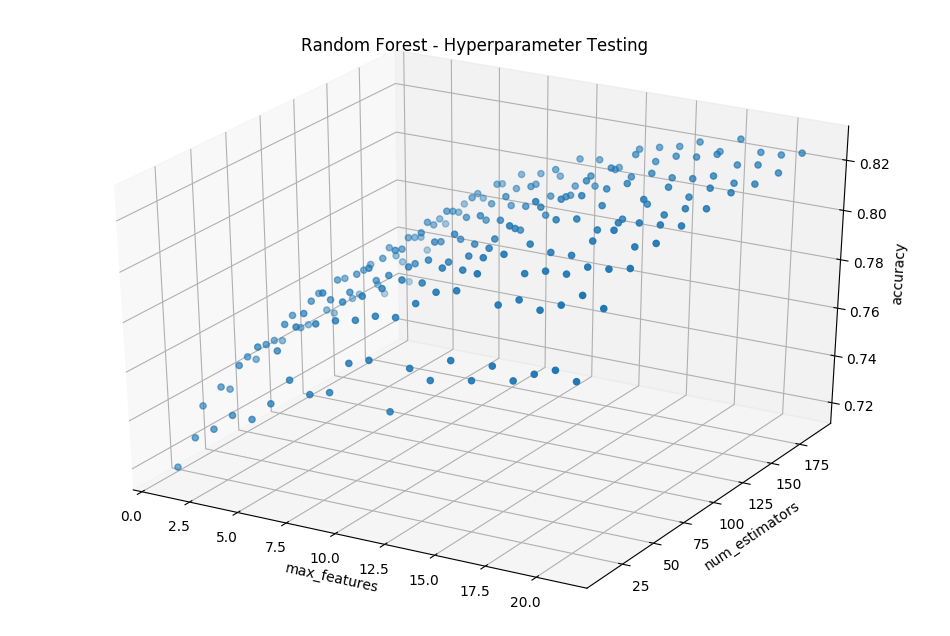

In [73]:
import re
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Data for a three-dimensional scattered points
x = results['max_features'].tolist()
y = results['num_estimators'].tolist()     # test removing .tolist() on all three lines
z = results['accuracy'].tolist()

# Creating figure
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(x, y, z, cmap = 'Greens')
plt.title("Random Forest - Hyperparameter Testing")
ax.set_xlabel('max_features')
ax.set_ylabel('num_estimators')
ax.set_zlabel('accuracy')

#Show the plot
plt.show()

In [74]:
results = results.sort_values('accuracy', ascending = False)
results.head()

,accuracy,max_features,num_estimators
179,0.825702,18.0,190.0
196,0.825342,20.0,130.0
178,0.824999,18.0,170.0
206,0.824998,21.0,130.0
209,0.824300,21.0,190.0


### Team Metrics on NEW DataFrame

In [76]:
grouped = normalized_df.groupby(['team_x', 'home_or_away_x']).mean()
grouped.head(50)

,,season_x,opposingTeam_x,Win_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,penaltiesFor_x,penalityMinutesFor_x,penaltiesFor_y,penalityMinutesFor_y
team_x,home_or_away_x,,,,,,,,,,,,,,,,,,,,,
0,0,2019.547170,16.415094,0.386792,-0.548626,-0.551811,-0.551801,0.101610,0.118534,0.121380,-0.270733,0.041206,-0.508575,0.253059,-0.205409,-0.138874,-0.258127,0.749834,0.251940,0.278888,-0.069907,0.032137
1,0,2019.500000,15.836066,0.442623,-0.272593,-0.268227,-0.276806,0.088690,0.117710,0.103239,-0.233078,0.380473,-0.261284,-0.205424,0.064611,0.324181,-0.436682,0.050412,-0.096198,-0.134965,-0.032374,-0.061238
2,0,2019.592920,16.380531,0.707965,0.014049,0.019290,0.036426,-0.300370,-0.309115,-0.318500,0.314799,0.271792,0.186544,-0.333256,-0.130787,0.430408,1.106967,0.448695,0.402837,0.409695,0.330145,0.326820
3,0,2019.574074,16.990741,0.435185,-0.453132,-0.455736,-0.460454,-0.044204,-0.042739,-0.023958,-0.451693,-0.982464,-0.643306,-0.748361,0.125409,-0.814900,-0.797756,-0.499288,-0.296636,-0.296623,-0.177608,-0.211278
4,0,2019.522124,15.053097,0.681416,0.821951,0.830859,0.815596,-0.084788,-0.074653,-0.099519,0.429122,-0.004789,0.755469,0.501321,0.038234,0.404747,0.410751,0.485873,0.101237,-0.035381,-0.114202,-0.190814
5,0,2019.409091,16.009091,0.509091,-0.179864,-0.177583,-0.189796,0.170087,0.173344,0.181971,-0.112267,-0.434410,-0.092850,-0.619155,0.220479,-0.627204,-0.219884,-0.673798,-0.221368,-0.256005,-0.281393,-0.288507
6,0,2019.500000,16.966667,0.633333,0.243263,0.225661,0.244685,-0.233991,-0.228478,-0.236239,0.105352,-0.743457,0.684847,0.940994,0.039196,-0.716903,0.534687,0.693095,-0.051139,-0.035464,-0.046398,-0.051841
7,0,2019.466019,13.805825,0.417476,-0.321366,-0.323443,-0.325803,0.134325,0.140620,0.147821,-0.259607,0.274129,0.168957,-0.004988,-0.012526,0.860461,0.587792,0.098661,-0.189147,-0.171924,-0.030510,-0.052940
8,0,2019.517857,16.008929,0.714286,0.314010,0.322863,0.333574,-0.361087,-0.347778,-0.383126,0.317564,-0.535205,0.017777,-0.890403,0.105550,-0.154954,0.132581,-0.881559,0.072985,0.046120,0.380663,0.319671
